In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/home/nishanth/tensorflow/california_housing/cal_housing.csv", header=None)
headers = open("/home/nishanth/tensorflow/california_housing/cal_housing.txt", "r")

In [3]:
headers = headers.readlines()
headers = [x.split(":")[0] for x in headers]
data.columns = headers
print data.head()

   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0  


In [4]:
#digging correlation between features
corr_mat = data.corr()
print corr_mat["medianHouseValue"].sort_values(ascending=False)

medianHouseValue    1.000000
medianIncome        0.688075
totalRooms          0.134153
housingMedianAge    0.105623
households          0.065843
totalBedrooms       0.050594
population         -0.024650
longitude          -0.045967
latitude           -0.144160
Name: medianHouseValue, dtype: float64


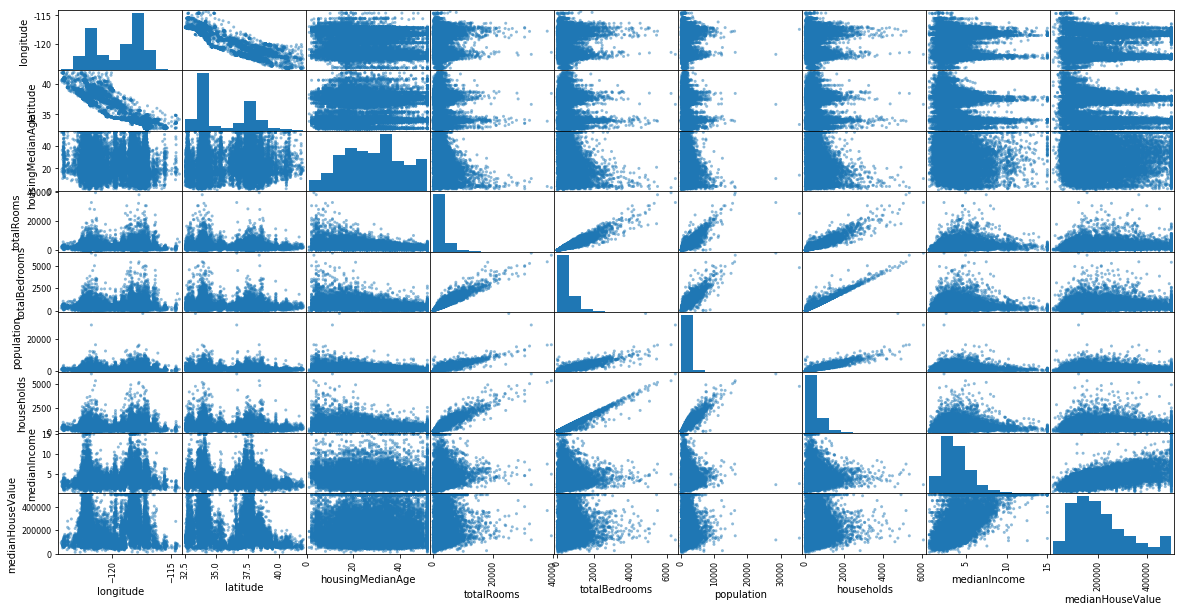

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,10))
plt.show()

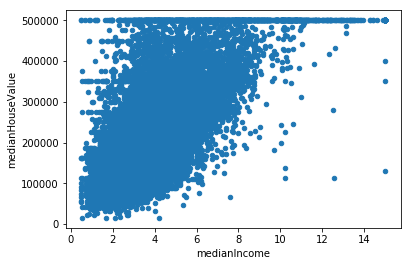

In [6]:
data.plot(kind='scatter', x = 'medianIncome', y = 'medianHouseValue')

In [7]:
#creating and evaluating features
data["rooms_per_household"] = data["totalRooms"]/data["households"]
data["bedrooms_per_room"] = data["totalBedrooms"]/data["totalRooms"]
data["population_per_household"] = data["population"]/data["households"]

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [8]:
corr_mat = data.corr()
print corr_mat['medianHouseValue'].sort_values(ascending=False)

medianHouseValue            1.000000
medianIncome                0.688075
rooms_per_household         0.151948
totalRooms                  0.134153
housingMedianAge            0.105623
households                  0.065843
totalBedrooms               0.050594
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255624
Name: medianHouseValue, dtype: float64


In [9]:
reordered = list(data.columns.values[:8]) +  list(data.columns.values[9:]) + [data.columns.values[8]]
data = data[reordered]
data.to_csv("/home/nishanth/tensorflow/california_housing/cal_housing_edited.csv", index=None)